In [1]:
#import dependacies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
#Create engine for import
engine = create_engine('postgresql://localhost:5432/sql_challenge')
conn = engine.connect()

#use conn to import all the tabels from the SQL database in DataFrames
department_data = pd.read_sql('SELECT * FROM "DEPARTMENT"', conn)
employee_data = pd.read_sql('SELECT * FROM "EMPLOYEE"', conn)
employee_data = employee_data.rename(columns={"EMP_TITLE_ID":"TITLE_ID"})
dept_emp_data = pd.read_sql('SELECT * FROM "DEPT_EMP"', conn)
dept_mgr_data = pd.read_sql('SELECT * FROM "DEPT_MANAGER"', conn)
salary_data = pd.read_sql('SELECT * FROM "SALARY"', conn)
title_data = pd.read_sql('SELECT * FROM "TITLE"', conn)


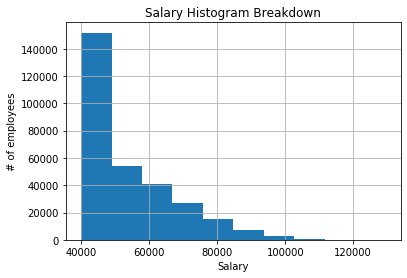

In [11]:
#Create Histogram for the salaries
salary_data.hist('SALARY')
plt.xlabel('Salary')
plt.ylabel('# of employees')
plt.title('Salary Histogram Breakdown')
plt.savefig('Histogram.png')
plt.show()

In [4]:
#merge data to create new dataframe with salary and title included with the employee data
mergeddata = employee_data.merge(salary_data, on='EMP_NO')
mergeddata = mergeddata.merge(title_data, on='TITLE_ID')
mergeddata.head()


,EMP_NO,TITLE_ID,BIRTH_DATE,FIRST_NAME,LAST_NAME,SEX,HIRE_DATE,SALARY,TITLE
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


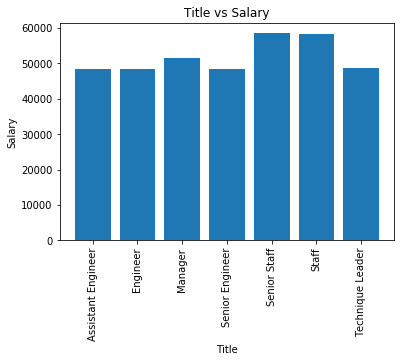

In [10]:
#find avg salary for each title and made dataframe
title_info = mergeddata.groupby('TITLE')['SALARY'].mean()
title_info_df = pd.DataFrame(title_info)
title_info_df = title_info_df.reset_index()
#set xticks and create label list
x_positon = np.arange(len(title_info_df))
objects = title_info_df['TITLE']
#create bar chart with titles and formatting
plt.bar(x_positon, title_info_df['SALARY'])
plt.xticks(x_positon,objects,rotation = 90)
plt.ylabel('Salary')
plt.xlabel('Title')
plt.title('Title vs Salary')
plt.savefig('BarChart.png')
plt.show()

In [6]:
#lookup my id (499942)
my_id = mergeddata.loc[mergeddata['EMP_NO']== 499942]
my_id

,EMP_NO,TITLE_ID,BIRTH_DATE,FIRST_NAME,LAST_NAME,SEX,HIRE_DATE,SALARY,TITLE
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,Technique Leader
